# Linear Regression-Fish Market Dataset

In [1]:
import numpy as np
import pandas as pd

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

### 1.Problem Statement

### 2. Data Gathering

In [47]:
df=pd.read_csv('Fish_Market.csv')
df['Width'].shape

(159,)

In [3]:
df.columns

Index(['Species', 'Length1', 'Length2', 'Length3', 'Height', 'Width',
       'Weight'],
      dtype='object')

### 3.Exploratary Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Length1  159 non-null    float64
 2   Length2  159 non-null    float64
 3   Length3  159 non-null    float64
 4   Height   159 non-null    float64
 5   Width    159 non-null    float64
 6   Weight   159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [5]:
df.head().T

0       1        2       3       4
Species  Bream   Bream    Bream   Bream   Bream
Length1   23.2    24.0     23.9    26.3    26.5
Length2   25.4    26.3     26.5    29.0    29.0
Length3   30.0    31.2     31.1    33.5    34.0
Height   11.52   12.48  12.3778   12.73  12.444
Width     4.02  4.3056   4.6961  4.4555   5.134
Weight   242.0   290.0    340.0   363.0   430.0

### 4.Feature Engineering

#### 1.Species

In [6]:
df['Species']

0      Bream
1      Bream
2      Bream
3      Bream
4      Bream
       ...  
154    Smelt
155    Smelt
156    Smelt
157    Smelt
158    Smelt
Name: Species, Length: 159, dtype: object

In [7]:
df['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [8]:
df=pd.get_dummies(df,columns=['Species'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Length1            159 non-null    float64
 1   Length2            159 non-null    float64
 2   Length3            159 non-null    float64
 3   Height             159 non-null    float64
 4   Width              159 non-null    float64
 5   Weight             159 non-null    float64
 6   Species_Bream      159 non-null    uint8  
 7   Species_Parkki     159 non-null    uint8  
 8   Species_Perch      159 non-null    uint8  
 9   Species_Pike       159 non-null    uint8  
 10  Species_Roach      159 non-null    uint8  
 11  Species_Smelt      159 non-null    uint8  
 12  Species_Whitefish  159 non-null    uint8  
dtypes: float64(6), uint8(7)
memory usage: 8.7 KB


#### 2.Length1

In [10]:
df['Length1'].value_counts()

19.0    6
20.0    5
22.0    4
20.5    4
25.4    3
       ..
33.7    1
25.6    1
24.1    1
22.1    1
13.2    1
Name: Length1, Length: 116, dtype: int64

In [49]:
df['Length1'].isna()

0      False
1      False
2      False
3      False
4      False
       ...  
154    False
155    False
156    False
157    False
158    False
Name: Length1, Length: 159, dtype: bool

<AxesSubplot:xlabel='Length1'>

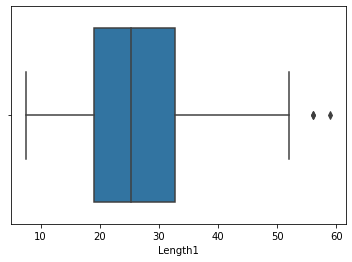

In [11]:
sns.boxplot(x = df['Length1'])   #check outlier in data

#### 3.Length2

In [12]:
df['Length2'].value_counts()

22.0    7
35.0    6
22.5    5
40.0    5
21.0    4
       ..
19.6    1
21.3    1
22.7    1
24.6    1
14.3    1
Name: Length2, Length: 93, dtype: int64

<AxesSubplot:xlabel='Length2'>

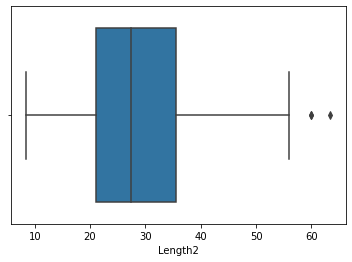

In [13]:
sns.boxplot(x = df['Length2']) 

In [14]:
#df.info()

#### 4.Length3

In [15]:
df['Length3'].value_counts()

23.5    5
25.0    3
22.5    3
34.0    3
45.5    3
       ..
27.9    1
26.8    1
26.7    1
27.2    1
15.2    1
Name: Length3, Length: 124, dtype: int64

#### 5.Height

In [16]:
df['Height'].value_counts()

11.1366    2
5.6925     2
2.2139     2
6.1100     2
9.6000     2
          ..
8.8768     1
8.5680     1
9.4850     1
8.3804     1
2.9322     1
Name: Height, Length: 154, dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Length1            159 non-null    float64
 1   Length2            159 non-null    float64
 2   Length3            159 non-null    float64
 3   Height             159 non-null    float64
 4   Width              159 non-null    float64
 5   Weight             159 non-null    float64
 6   Species_Bream      159 non-null    uint8  
 7   Species_Parkki     159 non-null    uint8  
 8   Species_Perch      159 non-null    uint8  
 9   Species_Pike       159 non-null    uint8  
 10  Species_Roach      159 non-null    uint8  
 11  Species_Smelt      159 non-null    uint8  
 12  Species_Whitefish  159 non-null    uint8  
dtypes: float64(6), uint8(7)
memory usage: 8.7 KB


#### 6. Width

In [45]:
df['Width'].value_counts()
df['Width'].unique().shape


(152,)

In [19]:
df['Width'].isna()

0      False
1      False
2      False
3      False
4      False
       ...  
154    False
155    False
156    False
157    False
158    False
Name: Width, Length: 159, dtype: bool

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Length1            159 non-null    float64
 1   Length2            159 non-null    float64
 2   Length3            159 non-null    float64
 3   Height             159 non-null    float64
 4   Width              159 non-null    float64
 5   Weight             159 non-null    float64
 6   Species_Bream      159 non-null    uint8  
 7   Species_Parkki     159 non-null    uint8  
 8   Species_Perch      159 non-null    uint8  
 9   Species_Pike       159 non-null    uint8  
 10  Species_Roach      159 non-null    uint8  
 11  Species_Smelt      159 non-null    uint8  
 12  Species_Whitefish  159 non-null    uint8  
dtypes: float64(6), uint8(7)
memory usage: 8.7 KB


#### 8 Weight

In [21]:
df['Weight'].value_counts()

300.0     6
1000.0    5
500.0     5
120.0     5
700.0     5
         ..
60.0      1
55.0      1
800.0     1
306.0     1
19.9      1
Name: Weight, Length: 101, dtype: int64

### 5.Feature Selection

#### 5.1 linearity

<Figure size 720x720 with 0 Axes>

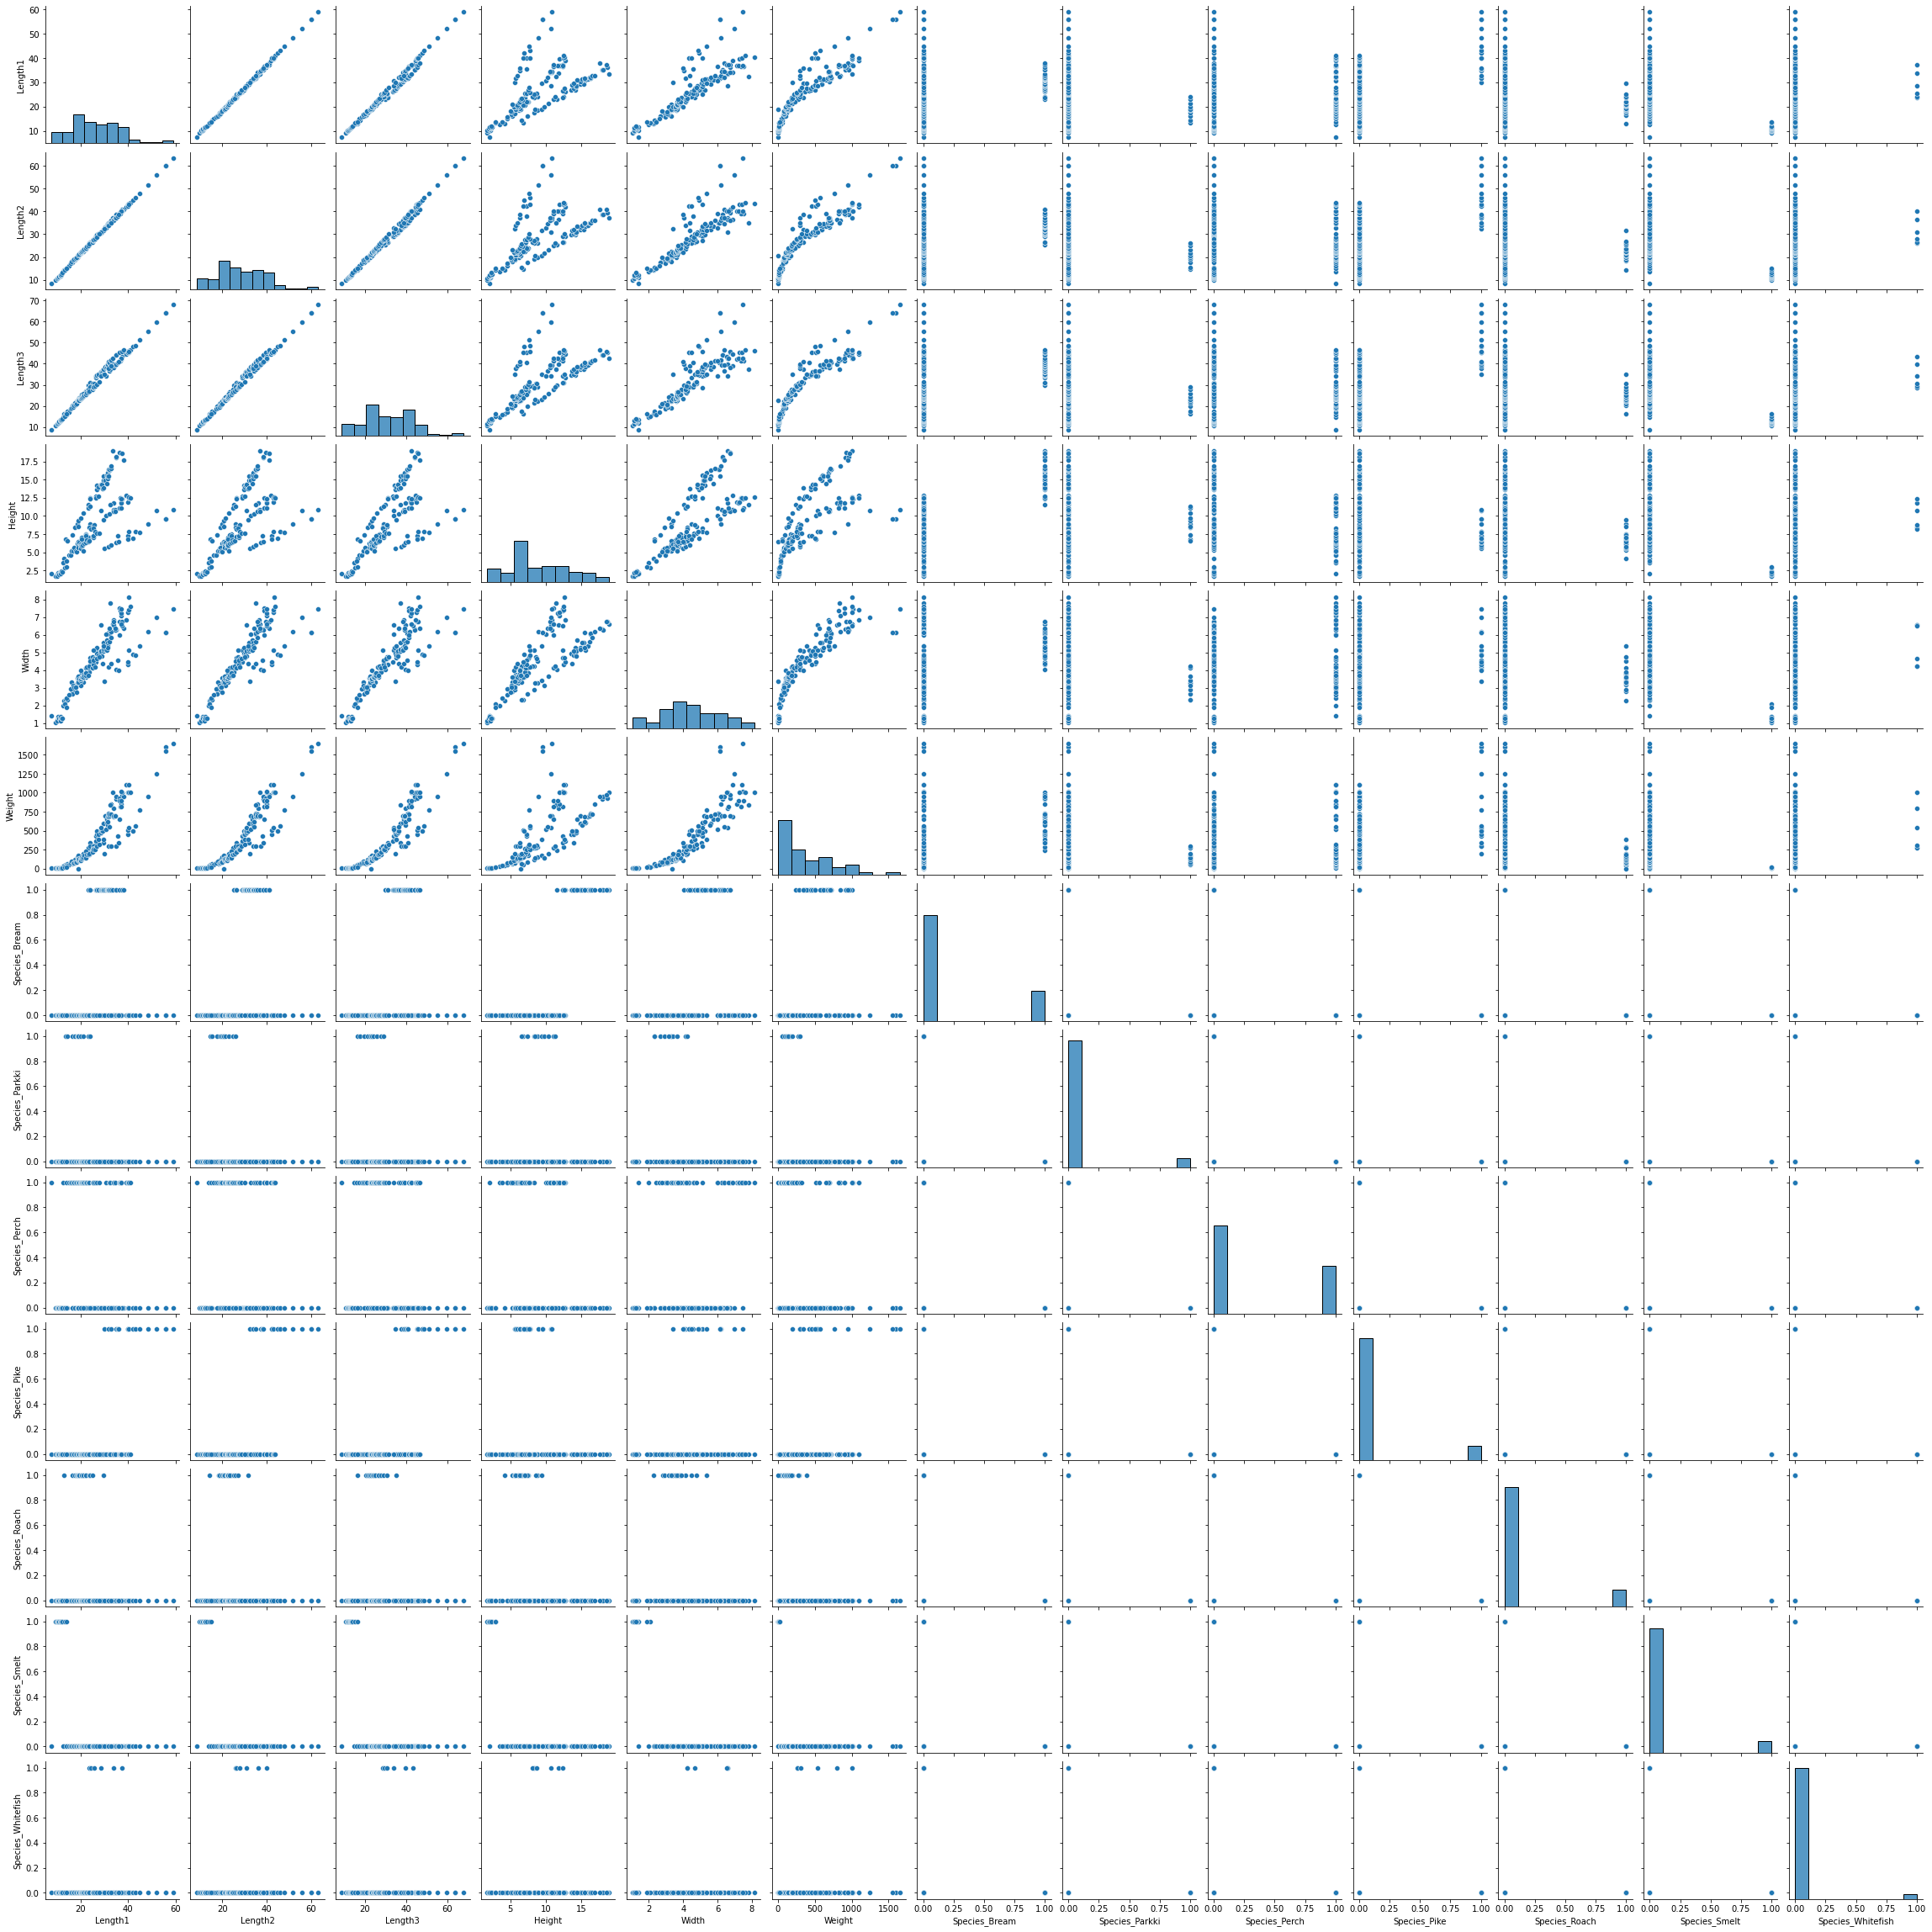

In [40]:
plt.figure(figsize=(10,10))
sns.pairplot(df)

In [22]:
df.corr()

Length1   Length2   Length3    Height     Width    Weight  \
Length1            1.000000  0.999517  0.992031  0.625378  0.867050  0.915712   
Length2            0.999517  1.000000  0.994103  0.640441  0.873547  0.918618   
Length3            0.992031  0.994103  1.000000  0.703409  0.878520  0.923044   
Height             0.625378  0.640441  0.703409  1.000000  0.792881  0.724345   
Width              0.867050  0.873547  0.878520  0.792881  1.000000  0.886507   
Weight             0.915712  0.918618  0.923044  0.724345  0.886507  1.000000   
Species_Bream      0.216380  0.233391  0.327170  0.772443  0.319347  0.326795   
Species_Parkki    -0.205732 -0.205957 -0.198718 -0.000547 -0.194147 -0.186034   
Species_Perch     -0.037845 -0.036090 -0.105478 -0.191405  0.144021 -0.033240   
Species_Pike       0.563514  0.552780  0.522894 -0.101810  0.137722  0.310641   
Species_Roach     -0.213250 -0.218048 -0.205072 -0.202076 -0.171465 -0.261784   
Species_Smelt     -0.467420 -0.479775 -0.488397 -0.491731 -0.569018 -0.337109   
Species_Whitefish  0.050731  0.053777  0.052864  0.048951  0.124388  0.073625   

                   Species_Bream  Species_Parkki  Species_Perch  Species_Pike  \
Length1                 0.216380       -0.205732      -0.037845      0.563514   
Length2                 0.233391       -0.205957      -0.036090      0.552780   
Length3                 0.327170       -0.198718      -0.105478      0.522894   
Height                  0.772443       -0.000547      -0.191405     -0.101810   
Width                   0.319347       -0.194147       0.144021      0.137722   
Weight                  0.326795       -0.186034      -0.033240      0.310641   
Species_Bream           1.000000       -0.144840      -0.391741     -0.183825   
Species_Parkki         -0.144840        1.000000      -0.201021     -0.094329   
Species_Perch          -0.391741       -0.201021       1.000000     -0.255127   
Species_Pike           -0.183825       -0.094329      -0.255127      1.000000   
Species_Roach          -0.201526       -0.103413      -0.279694     -0.131247   
Species_Smelt          -0.165083       -0.084712      -0.229116     -0.107513   
Species_Whitefish      -0.105209       -0.053988      -0.146018     -0.068519   

                   Species_Roach  Species_Smelt  Species_Whitefish  
Length1                -0.213250      -0.467420           0.050731  
Length2                -0.218048      -0.479775           0.053777  
Length3                -0.205072      -0.488397           0.052864  
Height                 -0.202076      -0.491731           0.048951  
Width                  -0.171465      -0.569018           0.124388  
Weight                 -0.261784      -0.337109           0.073625  
Species_Bream          -0.201526      -0.165083          -0.105209  
Species_Parkki         -0.103413      -0.084712          -0.053988  
Species_Perch          -0.279694      -0.229116          -0.146018  
Species_Pike           -0.131247      -0.107513          -0.068519  
Species_Roach           1.000000      -0.117866          -0.075117  
Species_Smelt          -0.117866       1.000000          -0.061533  
Species_Whitefish      -0.075117      -0.061533           1.000000

<AxesSubplot:>

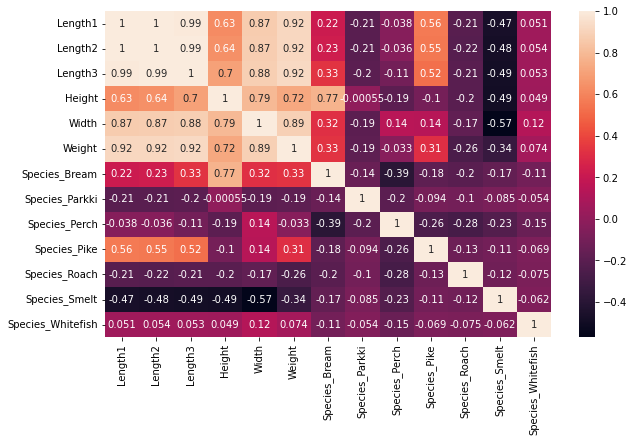

In [23]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

In [43]:
df.corr()['Weight']

Length1              0.915712
Length2              0.918618
Length3              0.923044
Height               0.724345
Width                0.886507
Weight               1.000000
Species_Bream        0.326795
Species_Parkki      -0.186034
Species_Perch       -0.033240
Species_Pike         0.310641
Species_Roach       -0.261784
Species_Smelt       -0.337109
Species_Whitefish    0.073625
Name: Weight, dtype: float64

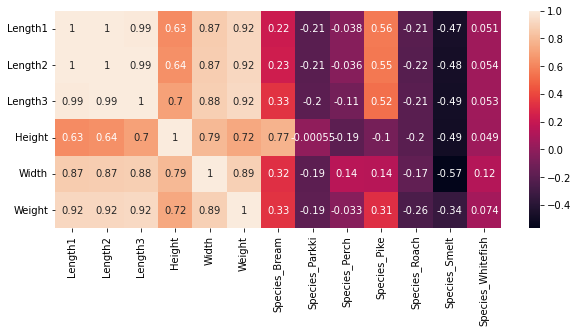

In [25]:
plt.figure(figsize=(10,4))
sns.heatmap(df.corr().head(6),annot=True)
plt.savefig('corr.png')

#### 5.2 No. Multicolinearity

In [26]:
x=df.drop('Weight',axis=1)
x

Length1  Length2  Length3   Height   Width  Species_Bream  \
0       23.2     25.4     30.0  11.5200  4.0200              1   
1       24.0     26.3     31.2  12.4800  4.3056              1   
2       23.9     26.5     31.1  12.3778  4.6961              1   
3       26.3     29.0     33.5  12.7300  4.4555              1   
4       26.5     29.0     34.0  12.4440  5.1340              1   
..       ...      ...      ...      ...     ...            ...   
154     11.5     12.2     13.4   2.0904  1.3936              0   
155     11.7     12.4     13.5   2.4300  1.2690              0   
156     12.1     13.0     13.8   2.2770  1.2558              0   
157     13.2     14.3     15.2   2.8728  2.0672              0   
158     13.8     15.0     16.2   2.9322  1.8792              0   

     Species_Parkki  Species_Perch  Species_Pike  Species_Roach  \
0                 0              0             0              0   
1                 0              0             0              0   
2                 0              0             0              0   
3                 0              0             0              0   
4                 0              0             0              0   
..              ...            ...           ...            ...   
154               0              0             0              0   
155               0              0             0              0   
156               0              0             0              0   
157               0              0             0              0   
158               0              0             0              0   

     Species_Smelt  Species_Whitefish  
0                0                  0  
1                0                  0  
2                0                  0  
3                0                  0  
4                0                  0  
..             ...                ...  
154              1                  0  
155              1                  0  
156              1                  0  
157              1                  0  
158              1                  0  

[159 rows x 12 columns]

In [27]:
vif_list=[]
for i in range(x.shape[1]):
    vif=variance_inflation_factor(x.to_numpy(),i)
    vif_list.append(vif)
    
s1 = pd.Series(vif_list, index= x.columns).sort_values()
s1

Species_Smelt           2.092898
Species_Whitefish       3.112737
Species_Parkki          5.539718
Species_Roach           6.880800
Species_Perch           9.945709
Species_Pike           16.572044
Width                  29.166505
Height                 56.203702
Species_Bream          64.207663
Length3              2076.937150
Length1              2360.425082
Length2              4307.918109
dtype: float64

### 6 Model Training

In [28]:
x = df.drop('Weight',axis = 1)
y = df['Weight']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2 , random_state=12)

In [29]:
x_test.shape

(32, 12)

In [30]:
linear_reg=LinearRegression()
linear_reg.fit(x_train,y_train)

LinearRegression()

### 7 Model Evalution

In [31]:
# testing data evalulation

y_test_pred=linear_reg.predict(x_test)

mse = mean_squared_error(y_test, y_test_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test,y_test_pred)
print("MAE :",mae)

r_squared = r2_score(y_test, y_test_pred)
print('R- Squared value :',r_squared)

MSE : 15317.731317359976
RMSE : 123.76482261676772
MAE : 76.75682399775734
R- Squared value : 0.9138176311731199


In [32]:
# Training data evalulation

y_train_pred=linear_reg.predict(x_train)

mse = mean_squared_error(y_train, y_train_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train,y_train_pred)
print("MAE :",mae)

r_squared = r2_score(y_train, y_train_pred)
print('R- Squared value :',r_squared)

MSE : 7401.439212097585
RMSE : 86.03161751413015
MAE : 63.328602251495155
R- Squared value : 0.9354402951125816


### Normality of residual

In [34]:
residual=y_train-y_train_pred
residual

24      -9.382006
71     -73.445279
148     27.053942
132      1.330063
153      6.186039
          ...    
3      -58.794464
130    -60.784806
134    -76.783218
155    -10.621310
75     128.420544
Name: Weight, Length: 127, dtype: float64

<AxesSubplot:xlabel='Weight', ylabel='Density'>

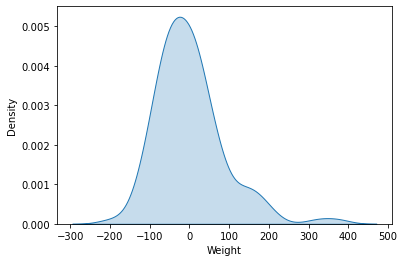

In [36]:
sns.kdeplot(residual,fill=True)

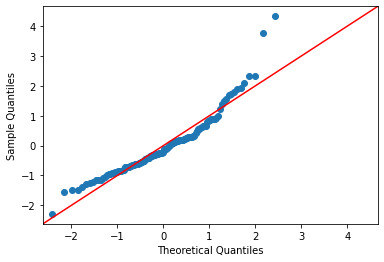

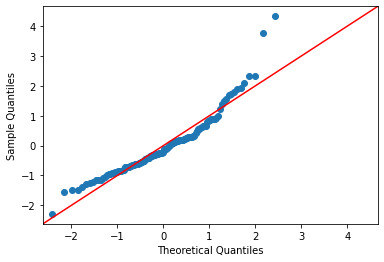

In [37]:
sm.qqplot(residual,line='45',fit=True)

<AxesSubplot:xlabel='Weight', ylabel='Weight'>

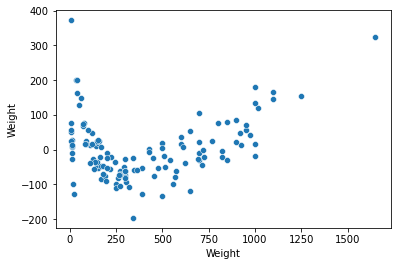

In [50]:
sns.scatterplot(x=y_train,y=residual)